## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [68]:
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
bom = pd.read_csv('ZippedData/bom.movie_gross.csv.gz')

In [70]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [71]:
bom.shape

(3387, 5)

In [72]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [73]:
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [74]:
bom.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [75]:
#dropping raws with no gross value
bom.dropna(subset=['foreign_gross','domestic_gross'], inplace=True)
bom.isna().sum()

title             0
studio            2
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [76]:
#duplicates
bom.duplicated().sum()

0

In [77]:
#drop missing values in studio
bom.dropna(subset = ['studio'], axis = 0, inplace = True)

In [78]:
conn = sqlite3.connect('zippedData/im.db')

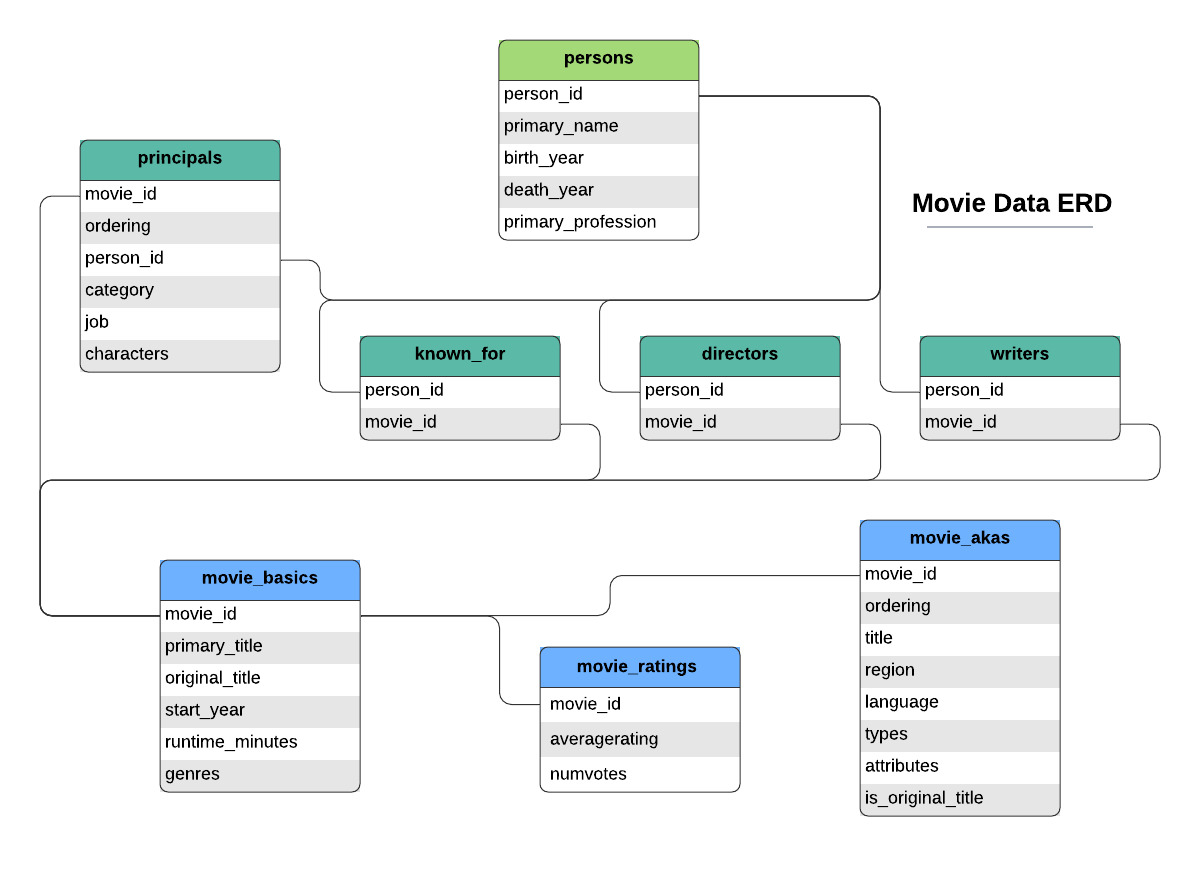

In [79]:
#select all colums from table name 
q1 = """
SELECT* FROM movie_ratings;
"""
pd.read_sql(q1, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [80]:
cur = conn.cursor()

In [81]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [82]:
q2 = pd.read_sql("""SELECT*
FROM movie_basics
;""",conn)

In [83]:
#select all colums from table name 
q1 = """
SELECT* FROM movie_basics;
"""
pd.read_sql(q1, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [84]:
# q3 = pd.read_sql("""SELECT primary_title, start_year, genres, averagerating, numvotes
# FROM movie_basics
# JOIN movie_ratings
#  USING(movie_id);""", conn)
# q3
q3 = pd.read_sql("""SELECT primary_title, start_year, genres, averagerating, numvotes
FROM movie_basics 
JOIN movie_ratings
    USING(movie_id);""", conn)
q3

,primary_title,start_year,genres,averagerating,numvotes
0,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,Drama,6.9,4517
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...
73851,Diabolik sono io,2019,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73853,Albatross,2017,Documentary,8.5,8
73854,La vida sense la Sara Amat,2019,None,6.6,5


In [85]:
movie_akas = pd.read_sql_query("""SELECT*
FROM movie_akas;""", conn)
movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [86]:
movie_akas['language'].unique()
movie_akas['language'].value_counts().head()

language
en    22895
tr     3847
bg     3609
fr     3576
he     2680
Name: count, dtype: int64

In [87]:
#select all colums from table name 
q1 = """
SELECT* FROM movie_ratings;
"""
pd.read_sql(q1, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [88]:
MB = pd.read_csv('ZippedData/tn.movie_budgets.csv.gz')

In [89]:
MB

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [90]:
MB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [91]:
DB = pd.read_csv('ZippedData/tmdb.movies.csv.gz')

In [92]:
DB.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [93]:
DB['original_language'].value_counts().head(5)

original_language
en    23291
fr      507
es      455
ru      298
ja      265
Name: count, dtype: int64

In [94]:
DB.shape

(26517, 10)

In [95]:
DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [96]:
DB.duplicated().sum()

0

In [97]:
#renaming the column for merging

bom.rename(columns={'title':'movie'}, inplace=True)
DB.rename(columns={'original_title':'movie'}, inplace=True)
q3.rename(columns={'primary_title':'movie'},inplace=True)

In [98]:
bom.head()

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [99]:
DB.head()

,Unnamed: 0,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [100]:
q3.head()

,movie,start_year,genres,averagerating,numvotes
0,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,Drama,6.9,4517
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119


In [101]:
popularity_ratings_df = q3.merge(DB, how = 'inner', on ='movie')

In [102]:
popularity_ratings_df.shape

(18019, 14)

In [103]:
df_budget_and_gross = bom.merge(MB, how = 'inner', on = 'movie')

In [104]:
df_budget_and_gross.shape

(1083, 10)

In [105]:
final_df = pd.merge(df_budget_and_gross, popularity_ratings_df, how = 'inner', on = 'movie')
final_df.head()

,movie,studio,domestic_gross_x,foreign_gross,year,id_x,release_date_x,production_budget,domestic_gross_y,worldwide_gross,...,numvotes,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",...,682218,7,"[16, 10751, 35]",10193,en,24.445,2010-06-17,Toy Story 3,7.7,8340
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642",...,1841066,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673",...,167532,38,"[35, 12, 14, 16, 10751]",10192,en,15.041,2010-05-16,Shrek Forever After,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828",...,211733,15,"[12, 14, 18, 10749]",24021,en,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389",...,657690,2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368


In [106]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1461 non-null   object 
 1   studio             1461 non-null   object 
 2   domestic_gross_x   1461 non-null   float64
 3   foreign_gross      1461 non-null   object 
 4   year               1461 non-null   int64  
 5   id_x               1461 non-null   int64  
 6   release_date_x     1461 non-null   object 
 7   production_budget  1461 non-null   object 
 8   domestic_gross_y   1461 non-null   object 
 9   worldwide_gross    1461 non-null   object 
 10  start_year         1461 non-null   int64  
 11  genres             1452 non-null   object 
 12  averagerating      1461 non-null   float64
 13  numvotes           1461 non-null   int64  
 14  Unnamed: 0         1461 non-null   int64  
 15  genre_ids          1461 non-null   object 
 16  id_y               1461 

In [107]:
list(final_df.columns)

['movie',
 'studio',
 'domestic_gross_x',
 'foreign_gross',
 'year',
 'id_x',
 'release_date_x',
 'production_budget',
 'domestic_gross_y',
 'worldwide_gross',
 'start_year',
 'genres',
 'averagerating',
 'numvotes',
 'Unnamed: 0',
 'genre_ids',
 'id_y',
 'original_language',
 'popularity',
 'release_date_y',
 'title',
 'vote_average',
 'vote_count']

In [108]:
final_df.drop(columns=['title', 'original_language'],inplace=True)
final_df.head()

,movie,studio,domestic_gross_x,foreign_gross,year,id_x,release_date_x,production_budget,domestic_gross_y,worldwide_gross,...,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id_y,popularity,release_date_y,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",...,"Adventure,Animation,Comedy",8.3,682218,7,"[16, 10751, 35]",10193,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642",...,"Action,Adventure,Sci-Fi",8.8,1841066,4,"[28, 878, 12]",27205,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673",...,"Adventure,Animation,Comedy",6.3,167532,38,"[35, 12, 14, 16, 10751]",10192,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828",...,"Adventure,Drama,Fantasy",5.0,211733,15,"[12, 14, 18, 10749]",24021,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389",...,"Action,Adventure,Sci-Fi",7.0,657690,2,"[12, 28, 878]",10138,28.515,2010-05-07,6.8,12368


In [109]:
final_df.nunique()

movie                 989
studio                 66
domestic_gross_x      729
foreign_gross         755
year                    9
id_x                  100
release_date_x        511
production_budget     196
domestic_gross_y      995
worldwide_gross       996
start_year             10
genres                196
averagerating          64
numvotes             1103
Unnamed: 0           1143
genre_ids             422
id_y                 1043
popularity            990
release_date_y        620
vote_average           50
vote_count            918
dtype: int64

In [110]:
#check duplicates
final_df.duplicated(['movie']).sum()

472

In [111]:
final_df.drop_duplicates(subset= ['movie'] ,inplace=True)
final_df.shape

(989, 21)

In [112]:
final_df.isna().sum()

movie                0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
id_x                 0
release_date_x       0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
start_year           0
genres               1
averagerating        0
numvotes             0
Unnamed: 0           0
genre_ids            0
id_y                 0
popularity           0
release_date_y       0
vote_average         0
vote_count           0
dtype: int64

In [113]:
#drop two raws with null vlues
final_df.dropna(subset = ['genres'],inplace=True)

In [114]:
final_df.dropna(subset = ['foreign_gross'],inplace=True)

In [115]:
final_df.isna().sum()

movie                0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
id_x                 0
release_date_x       0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
start_year           0
genres               0
averagerating        0
numvotes             0
Unnamed: 0           0
genre_ids            0
id_y                 0
popularity           0
release_date_y       0
vote_average         0
vote_count           0
dtype: int64

In [116]:
#explore popular genres in box office
popular = final_df.sort_values('popularity', ascending = False)

In [117]:
#individual genes in each raw
top_genres = [genre.split(',') for genre in popular['genres']]
top_genres

[['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Crime', 'Thriller'],
 ['Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Comedy'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Biography', 'Drama', 'Music'],
 ['Action', 'Mystery', 'Sci-Fi'],
 ['Action', 'Adventure', 'Animation'],
 ['Action', 'Adventure', 'Animation'],
 ['Biography', 'Comedy', 'Drama'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Biography', 'Drama', 'Thriller'],

In [118]:
top_genres_list = [genre_ for element in top_genres for genre_ in element]
top_genres_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Crime',
 'Thriller',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Family',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Biography',
 'Drama',
 'Music',
 'Action',
 'Mystery',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Animation',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Biography',
 'Drama',
 'Thriller',


In [119]:
unique_genres = []

for genre_ in top_genres_list:
    if genre_ not in unique_genres:
        unique_genres.append(genre_)


In [120]:
#number of times unique genre appeared
from collections import Counter

count_1 = Counter(top_genres_list)
count_1

Counter({'Drama': 457,
         'Comedy': 362,
         'Action': 318,
         'Adventure': 273,
         'Thriller': 173,
         'Crime': 157,
         'Romance': 131,
         'Horror': 97,
         'Sci-Fi': 96,
         'Mystery': 87,
         'Biography': 86,
         'Fantasy': 85,
         'Animation': 83,
         'Family': 64,
         'History': 29,
         'Music': 28,
         'Sport': 18,
         'Documentary': 11,
         'War': 6,
         'Western': 5,
         'Musical': 3})

In [121]:
#seperate genre and count
genre = []
count = []

for key, values in count_1.items():
    genre.append(key)
    count.append(values)

C:\Users\Rion\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


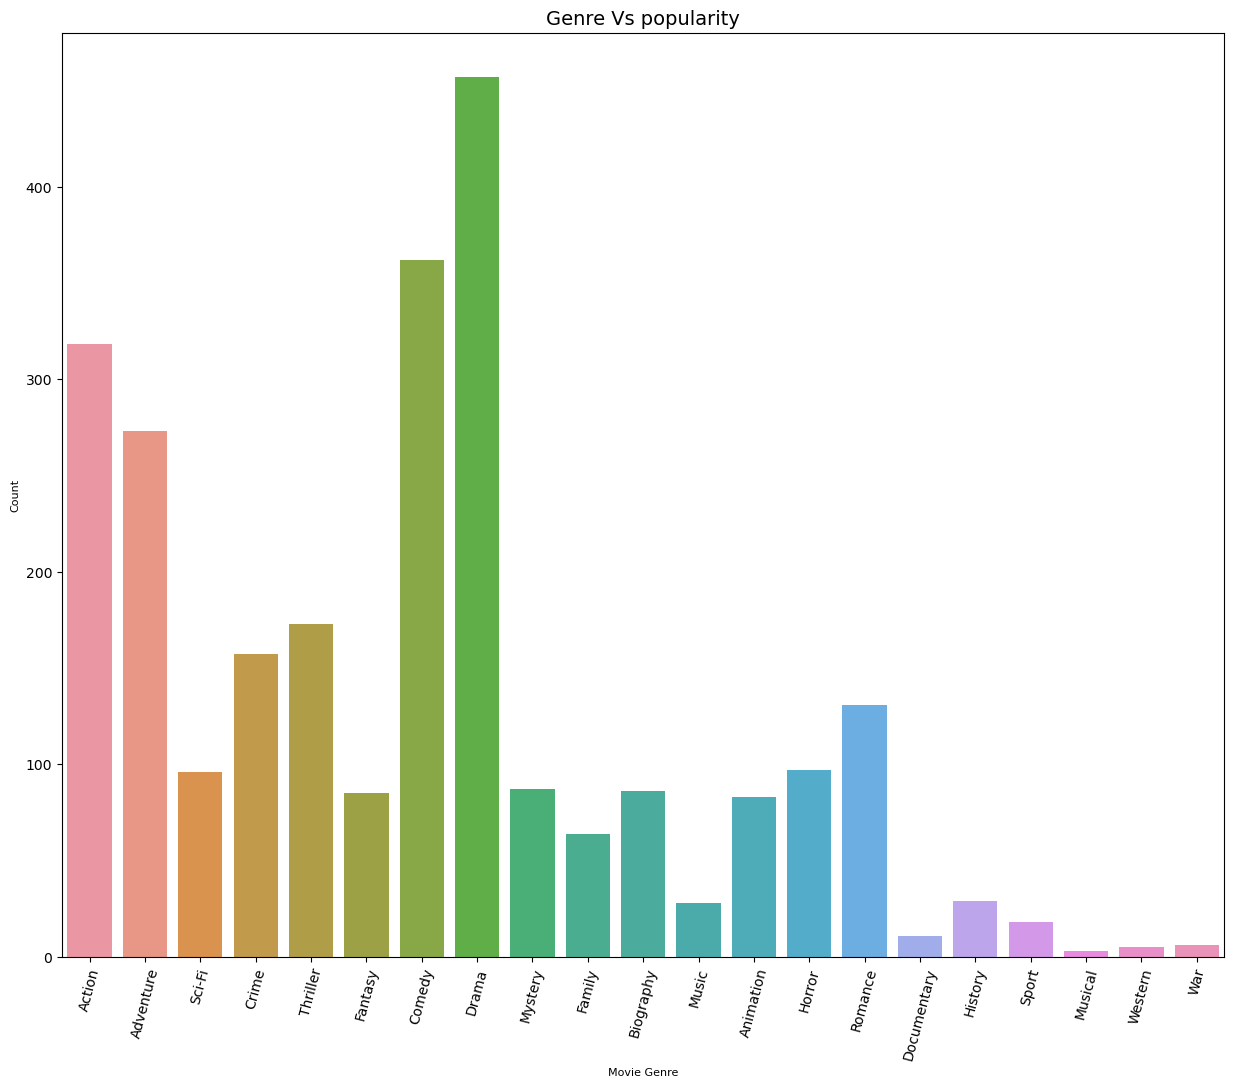

In [140]:
#plot data
fig, ax = plt.subplots(figsize=(15,12))
                                
x = genre
y = count

ax = sns.barplot(x=x, y=y, ax = ax)

ax.set_title('Genre Vs popularity', fontsize=14)
ax.set_xlabel('Movie Genre',fontsize=8)
ax.set_ylabel('Count', fontsize=8);

ax.set_xticklabels(labels = x, rotation = 75)
#fig.savefig('Genres Vs popularity.png');
plt.show()

In [127]:
#highly voted movie
movie_ratings = final_df.sort_values(by = ['popularity', 'vote_average'],ascending=(False, False)).head(20)
movie_ratings = movie_ratings.sort_values('vote_average',ascending=False).reset_index(drop=True)

In [165]:
movie_ratings.loc[:,['movie','vote_average','studio']]

,movie,vote_average,studio
0,Avengers: Infinity War,8.3,BV
1,Bohemian Rhapsody,8.1,Fox
2,Guardians of the Galaxy,7.9,BV
3,Deadpool 2,7.5,Fox
4,Thor: Ragnarok,7.5,BV
5,X-Men: Days of Future Past,7.5,Fox
6,Captain America: Civil War,7.4,BV
7,Blade Runner 2049,7.4,WB
8,Spider-Man: Homecoming,7.4,Sony
9,The Hobbit: The Battle of the Five Armies,7.3,WB (NL)


In [166]:
final_df['studio'].unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Sony', 'FoxS',
       'SGem', 'WB (NL)', 'LGF', 'MBox', 'W/Dim.', 'Focus', 'MGM',
       'Over.', 'Mira.', 'CBS', 'SPC', 'Free', '3D', 'RAtt.', 'Wein.',
       'Rela.', 'Magn.', 'App.', 'Drft.', 'IFC', 'Relbig.', 'Viv.', 'ATO',
       'Anch.', 'Gold.', 'Strand', 'FD', 'TriS', 'ORF', 'Jan.', 'Osci.',
       'OMNI/FSR', 'ParV', 'P4', 'LG/S', 'RTWC', 'LD', 'MNE', 'A24',
       'EOne', 'CE', 'DR', 'EC', 'BG', 'PFR', 'BST', 'FCW', 'STX',
       'BH Tilt', 'GrtIndia', 'Neon', 'Affirm', 'Studio 8', 'Annapurna',
       'Global Road', 'Amazon', 'VE'], dtype=object)

In [167]:
#popular studios with highest grossing
highest_gross = final_df.sort_values('worldwide_gross', ascending = False).head()
highest_gross.reset_index(drop=True)

,movie,studio,domestic_gross_x,foreign_gross,year,id_x,release_date_x,production_budget,domestic_gross_y,worldwide_gross,...,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id_y,popularity,release_date_y,vote_average,vote_count
0,Insidious,FD,54000000.0,43000000,2011,63,"Apr 1, 2011","$1,500,000","$54,009,150","$99,870,886",...,"Horror,Mystery,Thriller",6.9,254197,2498,"[27, 53]",49018,16.197,2011-04-01,6.9,3582
1,Alpha,Studio 8,35900000.0,62300000,2018,79,"Aug 17, 2018","$51,000,000","$35,851,379","$99,624,873",...,Crime,5.5,102,23867,"[12, 18]",399360,24.536,2018-08-17,5.9,1167
2,Justin Bieber: Never Say Never,Par.,73000000.0,26000000,2011,48,"Feb 11, 2011","$13,000,000","$73,013,910","$99,034,125",...,"Documentary,Music",1.6,74978,2696,"[99, 10402, 10751]",54518,8.602,2011-02-11,5.1,240
3,Philomena,Wein.,37700000.0,62400000,2013,65,"Nov 22, 2013","$12,000,000","$37,709,979","$98,963,392",...,"Biography,Comedy,Drama",7.6,88704,8068,[18],205220,8.978,2013-11-27,7.4,945
4,Black Mass,WB,62600000.0,37200000,2015,59,"Sep 18, 2015","$53,000,000","$62,575,678","$98,837,872",...,"Biography,Crime,Drama",6.9,155847,14239,"[18, 80]",261023,14.646,2015-09-18,6.4,2020


In [168]:
import matplotlib.ticker as mticker

C:\Users\Rion\AppData\Local\Temp\ipykernel_7764\3352326344.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(labels = y,fontsize=12)


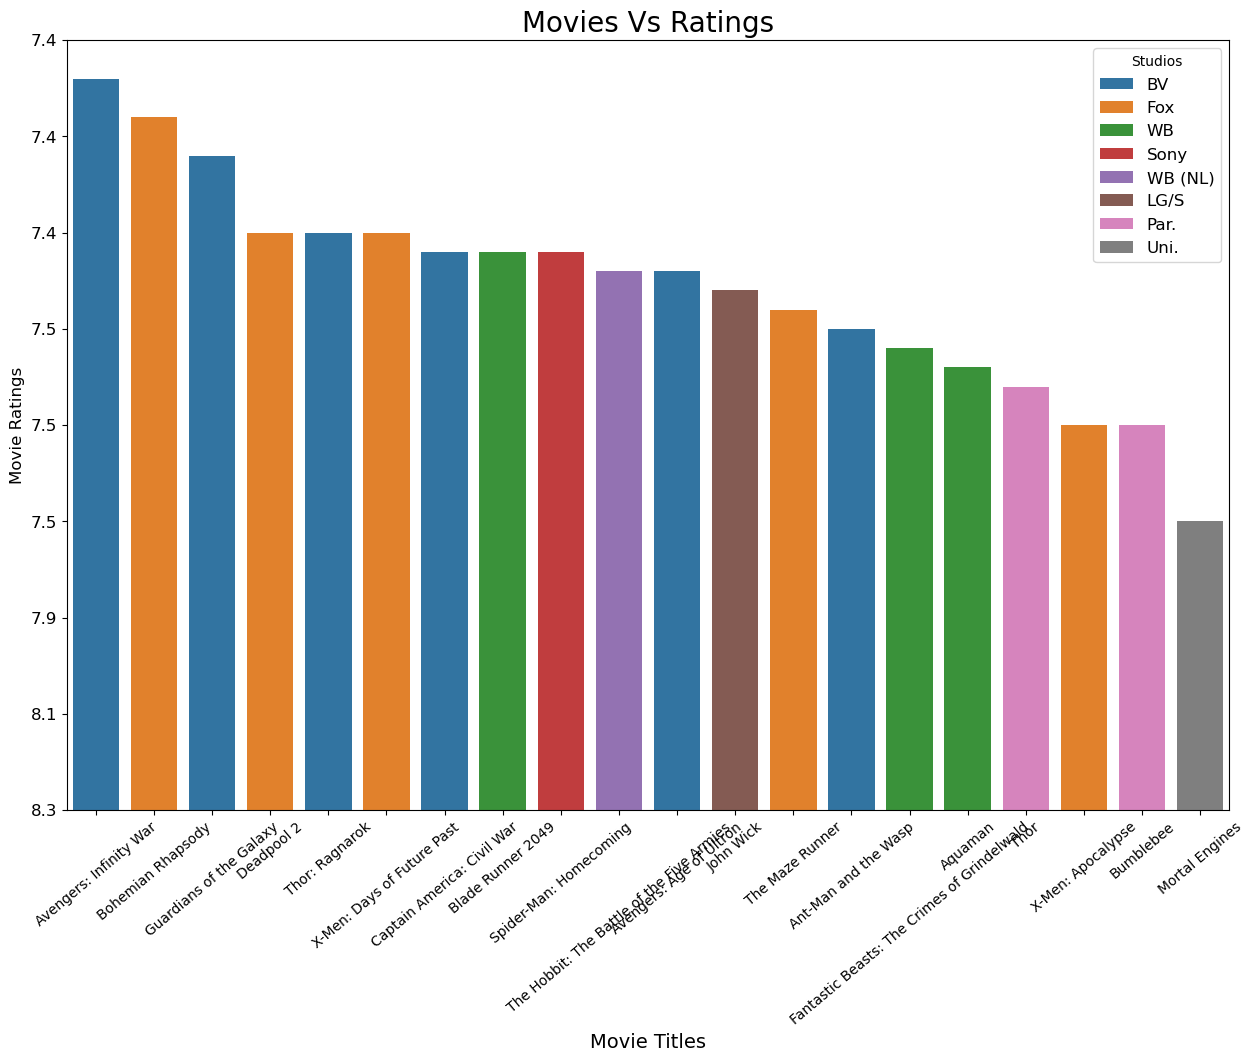

In [129]:
fig, ax1= plt.subplots(figsize=(15,10))
x = list(movie_ratings['movie'].values)
y = movie_ratings['vote_average']
ax1 = sns.barplot(data = movie_ratings, x = 'movie', y = 'vote_average', hue = 'studio', ax = ax1, dodge = False)

ax1.set_title('Movies Vs Ratings', fontsize=20)
ax1.set_xlabel('Movie Titles', fontsize=14)
ax1.set_ylabel('Movie Ratings', fontsize=12)
ax1.legend(title='Studios', fontsize=12, loc=1)
ax1.set_yticklabels(labels = y,fontsize=12)

ax1.set_xticklabels(labels = x, rotation = 40)
ax1.set_ylim(4.5, 8.5)
#fig.savefig('Movie Vs Ratings per studio.png')
plt.show()

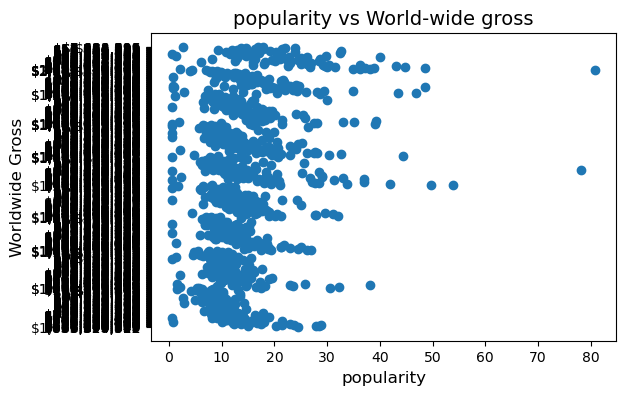

In [139]:
#plotting scatterplot
fig, ax= plt.subplots(figsize=(6,4))

x = final_df['popularity']
y = final_df['worldwide_gross']

ax.scatter(x,y)

ax.set_title('popularity vs World-wide gross', fontsize=14)
ax.set_xlabel('popularity',fontsize=12)
ax.set_ylabel('Worldwide Gross', fontsize=12)
#fig.savefig('popularity vs Worldwide gross.png')
plt.show()

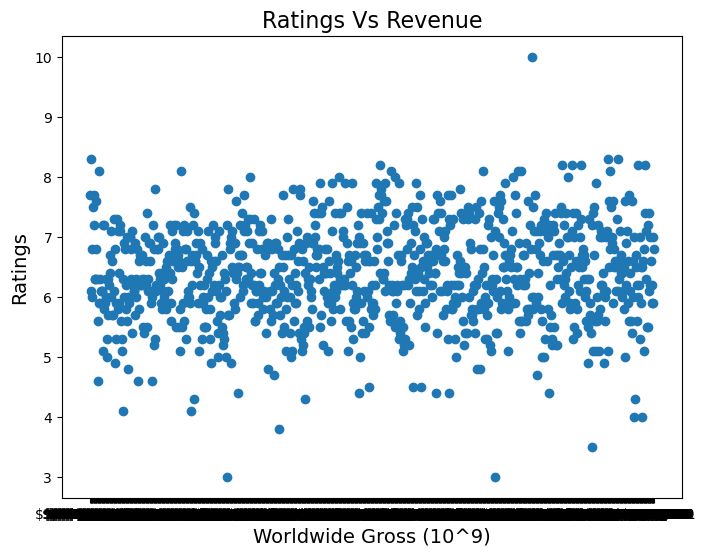

In [135]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = final_df['worldwide_gross']
y = final_df['vote_average']

ax.scatter(x,y)

ax.set_title('Ratings Vs Revenue', fontsize=16)
ax.set_ylabel("Ratings",fontsize=14)
ax.set_xlabel("Worldwide Gross (10^9)", fontsize=14)
fig.savefig('Ratings vs Revenue.png');
